In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy import optimize

In [50]:
t = np.linspace(-100,100, 200)
w = 10
noise = np.random.normal(0,0.5,t.shape[0])
y = np.sin(2*np.pi*w*t) + noise

cut = (t>75)
ywithgap = y[~cut]
twithgap = t[~cut]

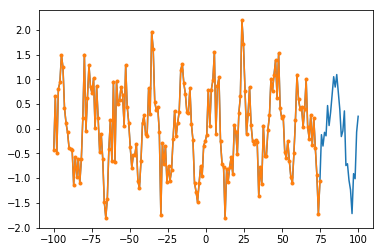

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(t,y)
ax.plot(twithgap, ywithgap, '.-')

### Theta method

In [64]:
def fitfunc(p, t, yt):
    theta, slope, intercept = p
    yfit = theta*yt + (1-theta)*(slope*t + intercept)
    return yfit

#errfunc = lambda p, t, yt: (fitfunc(p, t, yt) - yt)**2
errfunc = lambda p, t, yt: (yt - fitfunc(p, t, yt))**2/(fitfunc(p,t,yt))

### Model fitting

In [65]:
p0 = [0.5, 0.8, 0.01] # Initial guess for the parameters
p1, success = sp.optimize.leastsq(errfunc, p0[:], args=(twithgap, ywithgap))

In [66]:
p1

array([ 0.99999999,  1.2795915 , 10.71109244])

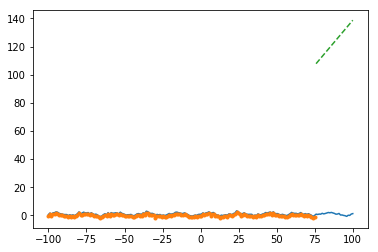

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(t,y+1)
ax.plot(twithgap, ywithgap, '.-')

ax.plot(t[cut], p1[1]*t[cut] + p1[2], '--')
#ax.plot(t, fitfunc(p1, t, y), '--')

In [68]:
success

2